In [345]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
sys.path.append("..")
sys.path.append("../my_implmnt")
import matplotlib.pyplot as plt
import pandas as pd
from utils import prepareDatase,accuracy
from sklearn.utils import shuffle
from Gaussian_NaiveBayes import GaussianNaiveBayes
from activeLearning import activeLearning
from sklearn.naive_bayes import GaussianNB


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [346]:
train, test_ = prepareDatase().get_train_test('../dataset/iris.csv',normlzd = False,\
                                ratio = 0.1, x_y_split = False)
test, pool_set = prepareDatase().splitInto_test_train(test_, 0.3)
#get_train_test() shuffles the data before splitting
x_train, y_train  = \
        train[["sepal_length","petal_width"]], train[[train.columns[-1]]]
x_test, y_test = \
        test[["sepal_length","petal_width"]], test[[test.columns[-1]]]
pool_set = pool_set[["sepal_length","petal_width","species"]]

In [347]:
al = activeLearning()
#this is not working as expected

In [353]:
al.model = GaussianNaiveBayes()
al.seed_fit(x_train, y_train)

Accuracy before active learning

In [354]:
y_hat_1 = al.model.predict(x_test)
accuracy(y_hat_1, y_test.get_values())

0.6

Accuracy after active learning

In [358]:
l=[]
for i in np.arange(1,52):
    al.pool_based(i,pool_set)
    y_hat = al.model.predict(x_test)
    l.append(accuracy(y_hat, y_test.get_values()))

In [359]:
y_hat = al.model.predict(x_test)
accuracy(y_hat, y_test.get_values())

[autoreload of activeLearning failed: Traceback (most recent call last):
  File "/home/ac-optimus/anaconda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/home/ac-optimus/anaconda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/home/ac-optimus/anaconda/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/ac-optimus/anaconda/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "../my_im

0.675

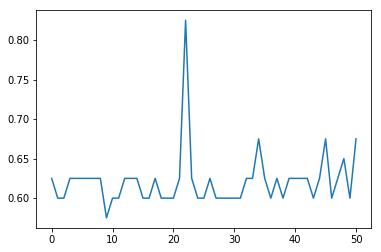

In [360]:
plt.plot(np.arange(len(l)),l);

In [277]:
y_hat = my_GNB.predict(x_test)

In [278]:
accuracy(y_hat, y_test.values)

0.425